#                           Medical Cost Prediction 

## Import the required Libraries

In [1]:
import os
import pandas as pd
import numpy as np
import datetime 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import warnings
import statistics
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.linear_model  import LinearRegression


## Import/Read the data from insurance.csv, check for NaN, Outliers and other stats 

In [2]:
# Read the given CSV file, and view some sample records
medical = pd.read_csv('insurance.csv')
print('Shape :',medical.shape)
medical.head()

Shape : (1338, 7)


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
medical.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [4]:
medical.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Boxplot of AGE feature 



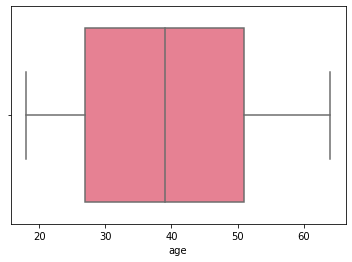

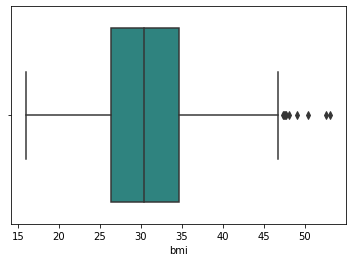

In [5]:
# Boxplot of AGE and BMI feature 

print('Boxplot of AGE feature \n')

sns.boxplot(x=medical['age'],palette = 'husl')
plt.show()

sns.boxplot(x=medical['bmi'],palette = 'viridis')
plt.show()

## BMI has upper bout outlier identify and remove them from the data 

In [6]:
Q1 = medical.bmi.quantile(0.25)
Q3 = medical.bmi.quantile(0.75)
IQR = Q3 - Q1
print('IQR : ',IQR)
Lower_Bound= Q1 - 1.5 * IQR
Upper_Bound= Q3 + 1.5 * IQR

print('BMI min : ',medical.bmi.min(),' BMI max : ',medical.bmi.max(),' Q1 : ',Q1,' Q3 : ',Q3,' IQR : ',IQR,' Lower_Bound: ',Lower_Bound,' Upper_Bound : ',Upper_Bound)

print('Shape Pre outlier handling : ',medical.shape)

medical=medical[((medical['bmi']> Lower_Bound)&(medical['bmi']< Upper_Bound))]

print('Shape Post outlier handling : ',medical.shape)

IQR :  8.3975
BMI min :  15.96  BMI max :  53.13  Q1 :  26.29625  Q3 :  34.69375  IQR :  8.3975  Lower_Bound:  13.7  Upper_Bound :  47.290000000000006
Shape Pre outlier handling :  (1338, 7)
Shape Post outlier handling :  (1329, 7)


## Plot Countplots of catagorical variables 

In [7]:
# User defined Function for Ploting and Value Counts
def feature_plot(df, x=None, y=None, hue=None, plot=True):
    if x == None:
        colname = y
    else:
        colname = x
    print(df[colname].value_counts())
    print('*'*40)
    #print("Mode:\n", df[colname].value_counts().index[0], ":", df[colname].value_counts()[0])
    if plot == True:
        sns.countplot(x = x, y = y, hue = hue, data=df)
        plt.show()

male      670
female    659
Name: sex, dtype: int64
****************************************


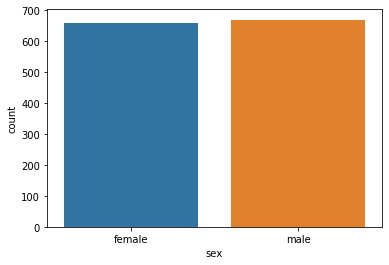

0    571
1    320
2    238
3    157
4     25
5     18
Name: children, dtype: int64
****************************************


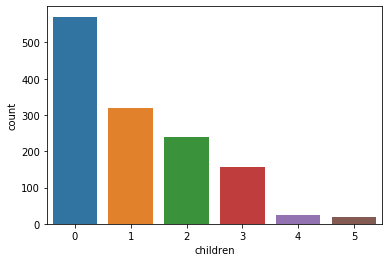

no     1058
yes     271
Name: smoker, dtype: int64
****************************************


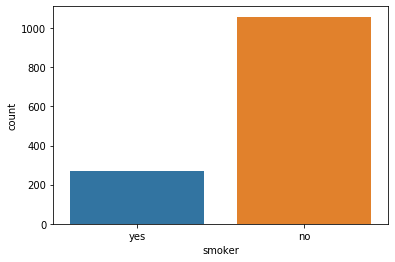

southeast    357
northwest    325
southwest    324
northeast    323
Name: region, dtype: int64
****************************************


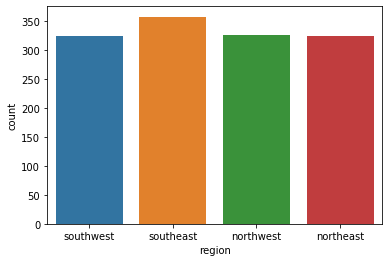

In [8]:
feature_plot(df=medical, x='sex')
feature_plot(df=medical, x='children')
feature_plot(df=medical, x='smoker')
feature_plot(df=medical, x='region')

## Plot data distribution for each column

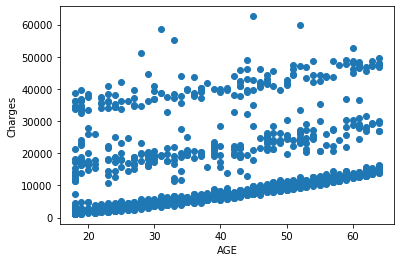

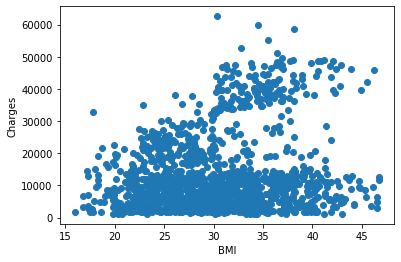

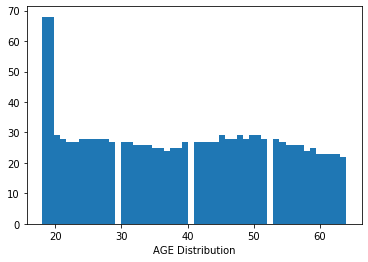

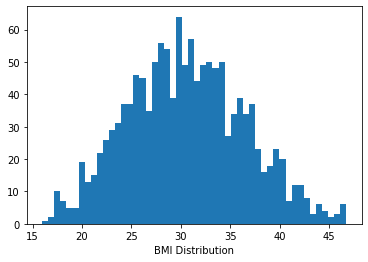

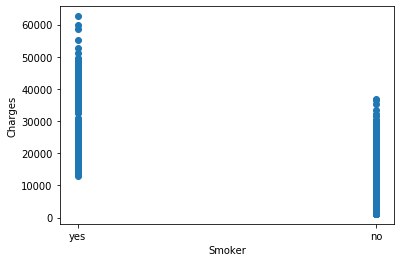

In [9]:
plt.scatter(medical.age, medical.charges, marker='o')
plt.xlabel("AGE")
plt.ylabel("Charges")
plt.show()

plt.scatter(medical.bmi, medical.charges, marker='o')
plt.xlabel("BMI")
plt.ylabel("Charges")
plt.show()

plt.hist(medical.age,bins=50)
plt.xlabel("AGE Distribution")
plt.show()

plt.hist(medical.bmi,bins=50)
plt.xlabel("BMI Distribution")
plt.show()

plt.scatter(medical.smoker, medical.charges, marker='o')
plt.xlabel("Smoker")
plt.ylabel("Charges")
plt.show()



In [10]:
medical.groupby(['smoker'])['charges'].mean()

smoker
no      8442.167174
yes    31835.343855
Name: charges, dtype: float64

## Create dummy variables to handle categorical values

In [11]:
########################
# Dummy variable creation
########################
print(medical.shape)
medical_dm = pd.get_dummies(medical, drop_first=True)
print(medical_dm.shape)


(1329, 7)
(1329, 9)


In [12]:
medical_dm.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


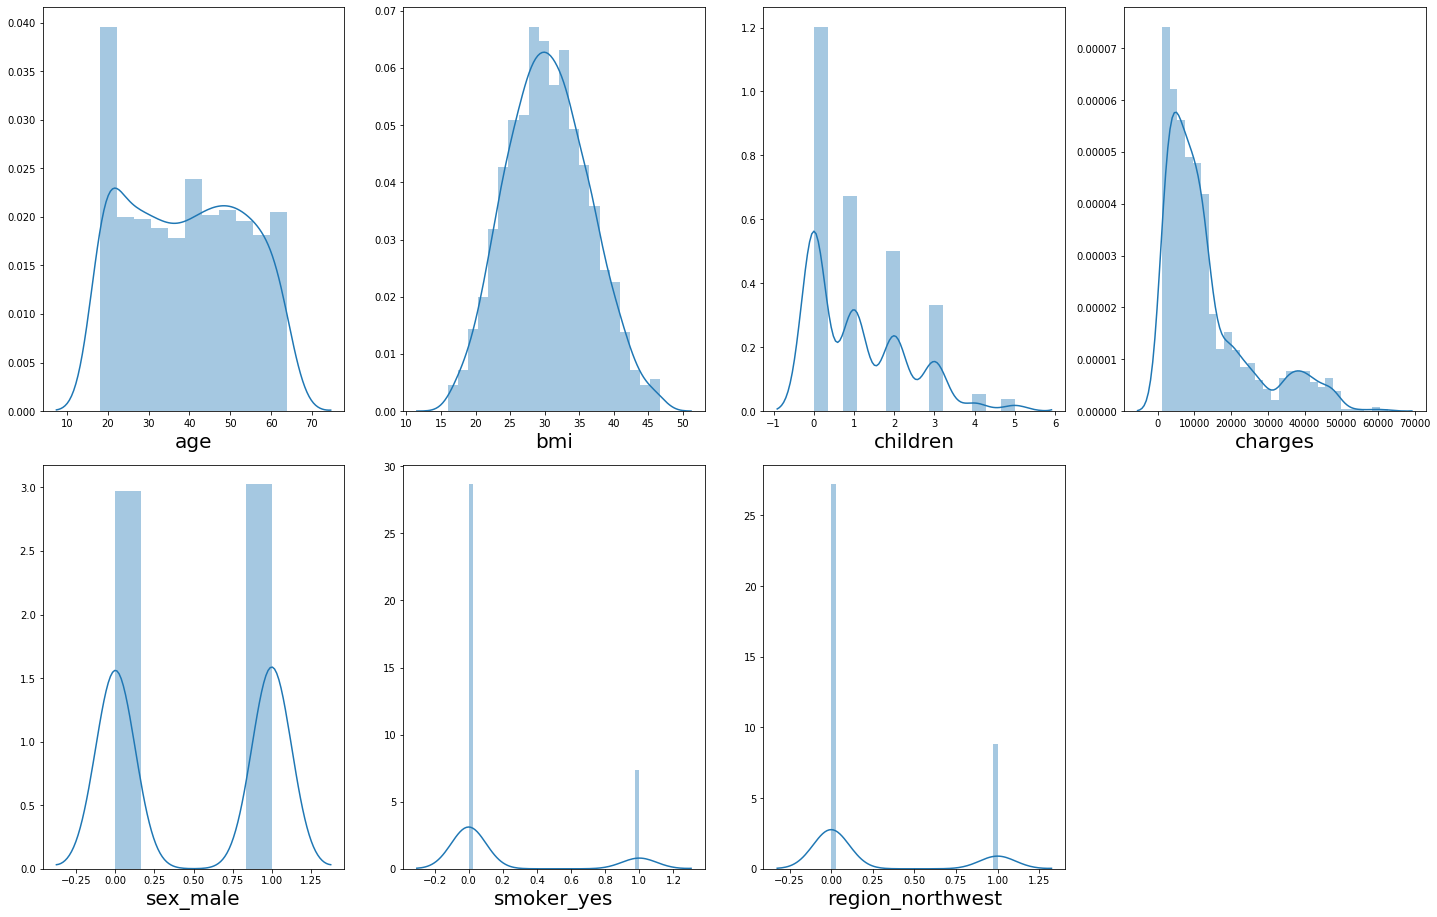

In [13]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in medical_dm:
    if plotnumber<=7 :
        ax = plt.subplot(4,4,plotnumber)
        sns.distplot(medical_dm[column])
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [14]:
medical_Y=medical_dm['charges']
medical_X=medical_dm.drop('charges',axis=1)
print('medical_Y shape',medical_Y.shape)
print('medical_X shape',medical_X.shape)

medical_Y shape (1329,)
medical_X shape (1329, 8)


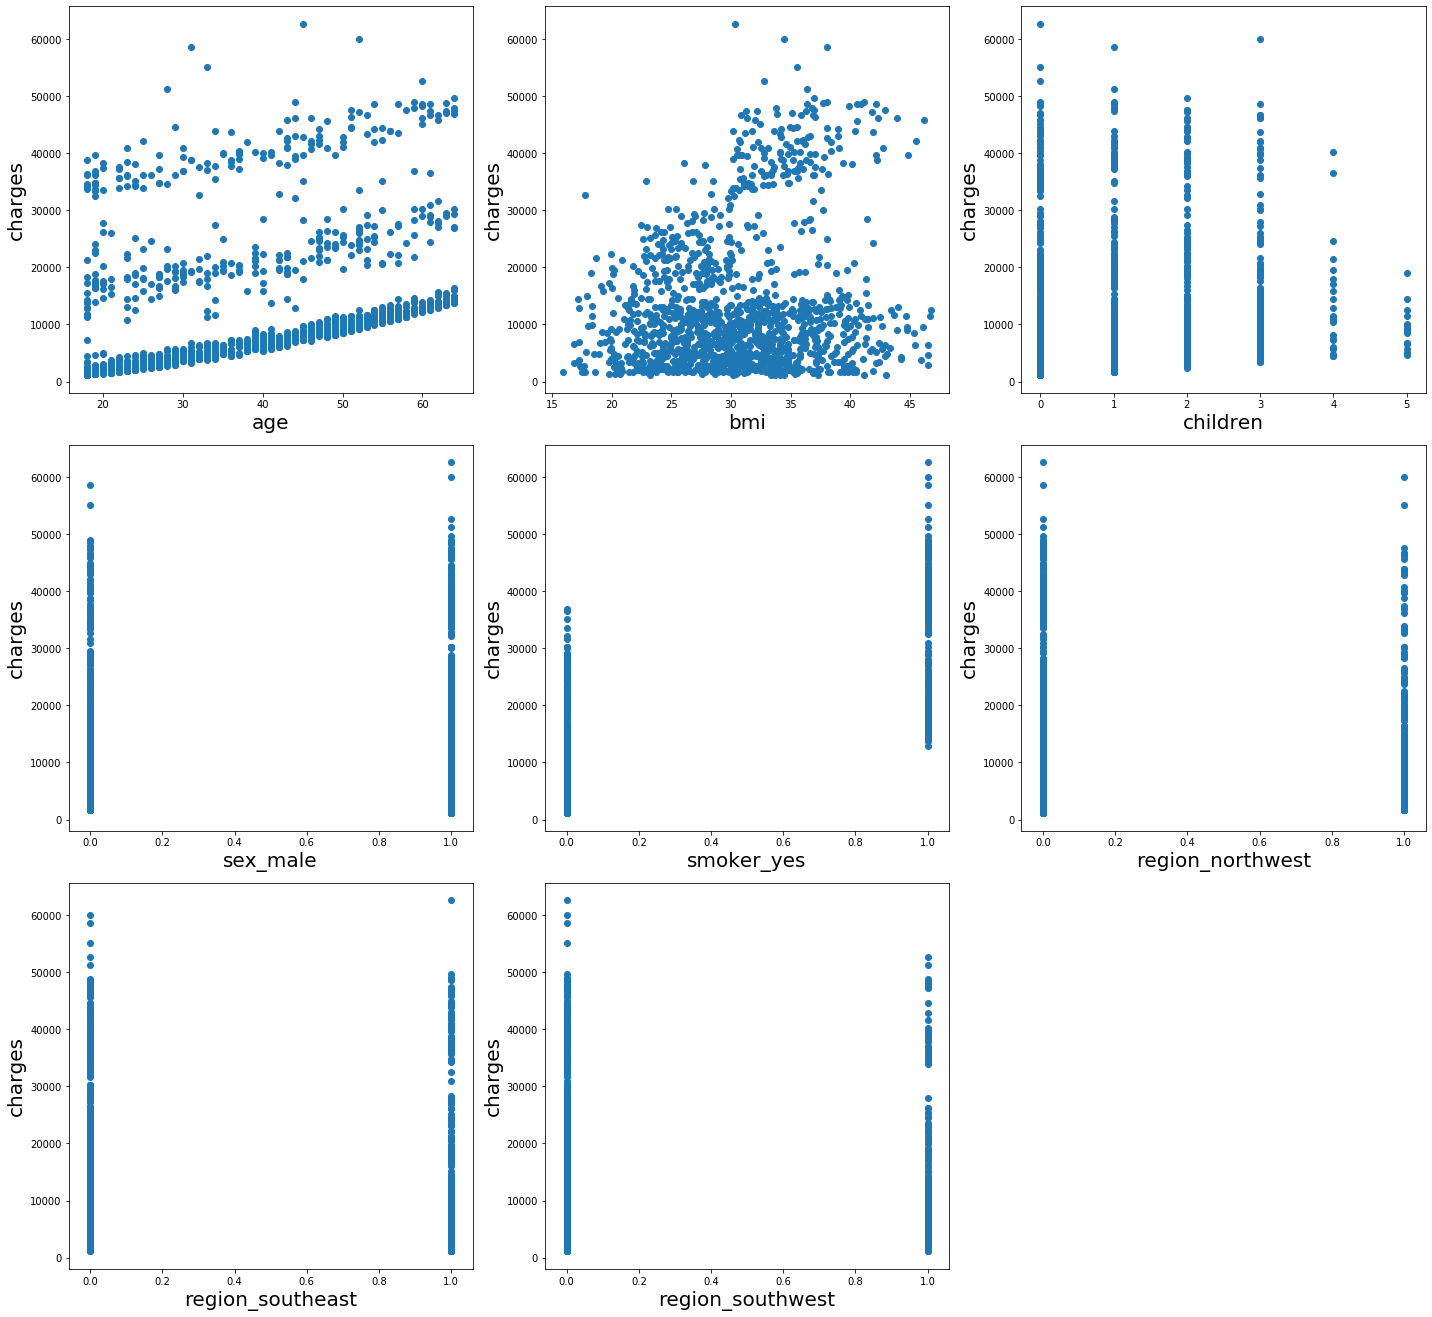

In [15]:
plt.figure(figsize=(20,30), facecolor='white')
plotnumber = 1

for column in medical_X:
    if plotnumber<=9:
        ax = plt.subplot(5,3,plotnumber)
        plt.scatter(medical_X[column],medical_Y)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('charges',fontsize=20)
    plotnumber+=1
plt.tight_layout()

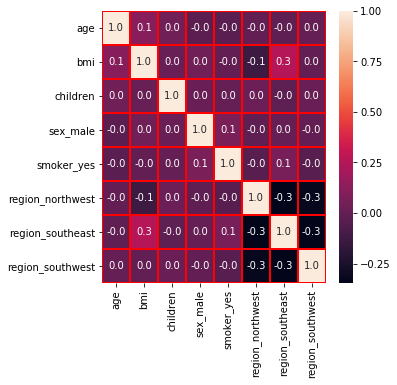

In [16]:
# Plotting the Heatmap of the columns using correlation matrix
f,ax = plt.subplots(figsize=(5, 5))
sns.heatmap(medical_X.corr(), annot=True, linewidths=0.9,linecolor="red", fmt= '.1f',ax=ax)
plt.show()